In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Loading in Data

In [2]:
all_scores = pd.read_csv("assists - Sheet1.csv")

In [3]:
all_scores.head()

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ
0,Tyrese Haliburton,IND,21,12,9,33.4,76.2,79.8,11.2,1.1,21.4,29.8,14.0,14.7,18.3
1,James Harden,PHI,9,4,5,36.7,67.8,79.6,10.0,1.0,18.0,25.9,12.3,14.8,18.2
2,Luka Doncic,DAL,19,10,9,37.4,56.7,70.1,8.6,1.1,17.0,22.5,10.4,15.1,18.4
3,Nikola Jokic,DEN,18,13,5,31.7,70.8,62.4,8.9,0.8,16.2,23.3,10.9,12.6,15.5
4,Trae Young,ATL,21,11,10,35.5,44.9,69.0,9.6,0.4,16.0,23.6,11.0,21.4,24.5


In [4]:
all_scores.columns

Index(['PLAYER', 'TEAM', 'GP', 'W', 'L', 'MIN', 'PASSES MADE',
       'PASSES RECEIVED', 'AST', 'SECONDARY AST', 'POTENTIAL AST',
       'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ'],
      dtype='object')

In [5]:
#potential assists per assist
all_scores['pa_per_assist'] = all_scores['POTENTIAL AST']/all_scores['AST']

In [6]:
all_scores

,PLAYER,TEAM,GP,W,L,MIN,PASSES MADE,PASSES RECEIVED,AST,SECONDARY AST,POTENTIAL AST,AST PTS CREATED,AST ADJ,AST TO PASS%,AST TO PASS% ADJ,pa_per_assist
0,Tyrese Haliburton,IND,21,12,9,33.4,76.2,79.8,11.2,1.1,21.4,29.8,14.0,14.7,18.3,1.910714
1,James Harden,PHI,9,4,5,36.7,67.8,79.6,10.0,1.0,18.0,25.9,12.3,14.8,18.2,1.800000
2,Luka Doncic,DAL,19,10,9,37.4,56.7,70.1,8.6,1.1,17.0,22.5,10.4,15.1,18.4,1.976744
3,Nikola Jokic,DEN,18,13,5,31.7,70.8,62.4,8.9,0.8,16.2,23.3,10.9,12.6,15.5,1.820225
4,Trae Young,ATL,21,11,10,35.5,44.9,69.0,9.6,0.4,16.0,23.6,11.0,21.4,24.5,1.666667
5,Chris Paul,PHX,10,7,3,30.2,58.9,58.2,9.4,0.9,15.8,23.8,11.3,16.0,19.2,1.680851
6,Kyle Lowry,MIA,22,10,12,36.4,68.8,67.6,6.1,0.6,14.2,16.3,7.7,8.9,11.2,2.327869
7,Darius Garland,CLE,16,8,8,35.6,55.1,73.4,8.1,0.8,13.9,19.8,9.8,14.7,17.7,1.716049
8,Mike Conley,UTA,17,11,6,29.3,58.9,59.8,7.9,0.8,13.9,20.8,9.4,13.4,15.9,1.759494
9,Jrue Holiday,MIL,16,13,3,31.9,51.8,59.1,7.3,0.7,13.8,18.0,8.5,14.0,16.4,1.890411


In [7]:
#Averages of Potential Assist per Assist
avg_potential = all_scores['pa_per_assist'].mean()
avg_potential

1.9011203178769305

## Preliminary graphs

<AxesSubplot:xlabel='AST', ylabel='POTENTIAL AST'>

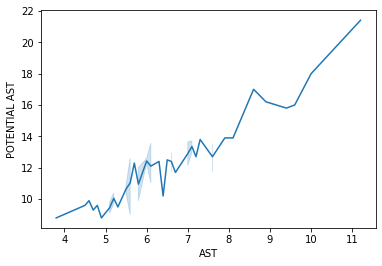

In [10]:
#Assists vs Potential AST
sns.lineplot(data=all_scores, x='AST', y='POTENTIAL AST')

<AxesSubplot:xlabel='AST', ylabel='pa_per_assist'>

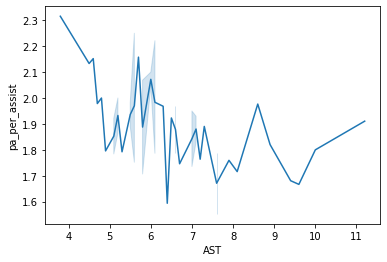

In [11]:
sns.lineplot(data=all_scores, x='AST', y='pa_per_assist')

<AxesSubplot:xlabel='AST', ylabel='AST TO PASS%'>

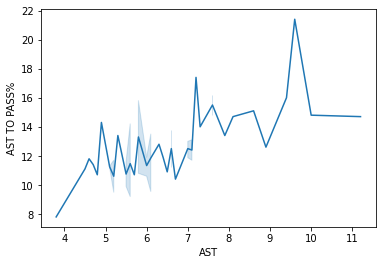

In [12]:
sns.lineplot(data=all_scores, x='AST', y='AST TO PASS%')